<a href="https://colab.research.google.com/github/Venky474/demo/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist


# New section

In [3]:
(x_train ,y_train), (x_test, y_test) = mnist.load_data()           #import data & reshape
x_train = x_train.reshape(-1,28*28).astype("float32")/255.0
x_test = x_test.reshape(-1,28*28).astype("float32")/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
#Sequential API                                                    # adding layers & nodes but add only single i/p & o/p
model = keras.Sequential(
        [
           keras.Input(shape=(28*28,)),
           layers.Dense(512, activation='relu'),
           layers.Dense(256, activation='relu'),
           layers.Dense(10),
        ]
)


model = keras.Sequential()
model.add(keras.Input(shape=(784,))),
model.add(layers.Dense(512, activation='relu')),
model.add(layers.Dense(256, activation='relu', name='my_layer')),
model.add(layers.Dense(10)),

model = keras.Model(inputs=model.inputs,
                    outputs=[layer.output for layer in model.layers])

features = model.predict(x_train)

for feature in features:
    print(feature.shape)

#Functional API                                                     #adding multiple i/p & o/p layers
inputs = keras.Input(shape=(784,))
x = (layers.Dense(512, activation='relu', name='first_layer'))(inputs)
x = (layers.Dense(256, activation='relu', name='second_layer'))(x)
outputs = (layers.Dense(10, activation='softmax'))(x)
model = keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=2)
model.evaluate(x_test, y_test, batch_size=32, verbose=2)



  13/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step    

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_4']
Received: inputs=Tensor(shape=(32, 784))
  warnings.warn(msg)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step
(60000, 512)
(60000, 256)
(60000, 10)
Epoch 1/5
1875/1875 - 16s - 8ms/step - accuracy: 0.9436 - loss: 0.1863
Epoch 2/5
1875/1875 - 22s - 12ms/step - accuracy: 0.9754 - loss: 0.0781
Epoch 3/5
1875/1875 - 19s - 10ms/step - accuracy: 0.9826 - loss: 0.0554
Epoch 4/5
1875/1875 - 20s - 11ms/step - accuracy: 0.9864 - loss: 0.0417
Epoch 5/5
1875/1875 - 17s - 9ms/step - accuracy: 0.9895 - loss: 0.0325
313/313 - 1s - 3ms/step - accuracy: 0.9783 - loss: 0.0777


[0.07767539471387863, 0.9782999753952026]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


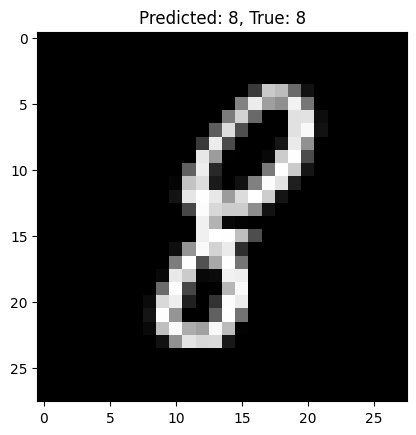

In [9]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = y_test[random_idx]
y_sample_true = y_test[random_idx]

# Add this line to get the model's predictions on the test set
y_pred = model.predict(x_test)

# Add this line to get the predicted class for each test sample
y_sample_pred_classes = np.argmax(y_pred, axis=1)

y_sample_pred_class = y_sample_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=12)
plt.imshow(x_sample.reshape((28,28)), cmap='gray')


